I'll be importing libraries that will be used to read our dataset, the dataset is available on kaggle <a href="https://www.kaggle.com/shivam2503/diamonds" target="_blank">click here</a> to chck the dataset online

In [1]:
#Importing libraries that will be used to read our data
import pandas as pd
import numpy as np
import seaborn as sns

#Reading data as a DataFrame
df = pd.read_csv('diamonds.csv', index_col=0)

In [2]:
#Checking the first five rows of the dataframe
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


There are categorical data in the dataset, we're predicting price of diamond. So we know that we'll be using a regression algorithm. But we have categorical data in the data. We could conc=vert the categorical data to numerical data.

In [3]:
#Let's check how many unique values in the `cut` column
df['cut'].describe()

count     53940
unique        5
top       Ideal
freq      21551
Name: cut, dtype: object

In [4]:
cut_class_dict = {'Fair': 1, 'Good': 2, 'Very Good': 3, 'Ideal': 4, 'Premium': 5}
clarity_dict = {"I3": 1, "I2": 2, "I1": 3, "SI2": 4, "SI1": 5, "VS2": 6, "VS1": 7, "VVS2": 8, "VVS1": 9, "IF": 10, "FL": 11}
color_dict = {"J": 1,"I": 2,"H": 3,"G": 4,"F": 5,"E": 6,"D": 7}

In [5]:
#df['cut'].astype('category').cat.codes

In [6]:
#Tuning the categorical data to numeric data
df['cut'] = df['cut'].map(cut_class_dict)
df['clarity'] = df['clarity'].map(clarity_dict)
df['color'] = df['color'].map(color_dict)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,4,6,4,61.5,55.0,326,3.95,3.98,2.43
2,0.21,5,6,5,59.8,61.0,326,3.89,3.84,2.31
3,0.23,2,6,7,56.9,65.0,327,4.05,4.07,2.31
4,0.29,5,2,6,62.4,58.0,334,4.20,4.23,2.63
5,0.31,2,1,4,63.3,58.0,335,4.34,4.35,2.75


In [7]:
df.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,3.760234,4.405803,6.051020,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.026956,1.701105,1.647136,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,1.000000,1.000000,3.000000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,3.000000,3.000000,5.000000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,4.000000,4.000000,6.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,5.000000,6.000000,7.000000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,5.000000,7.000000,10.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


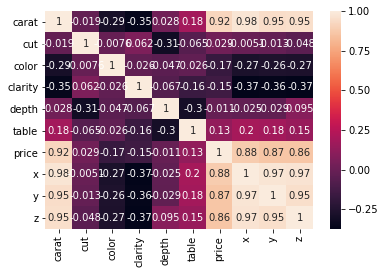

In [8]:
sns.heatmap(df.corr(), annot=True)

In [9]:
#Defining our features and target variable
X = df.drop('price', axis=1)
y = df['price']

In [10]:
print(X.shape)
y.shape

(53940, 9)


(53940,)

In [11]:
#Spliting our data into train and test variable
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.3, random_state = 5)

In [12]:
#Building our models
from sklearn.linear_model import LinearRegression

clf = LinearRegression(normalize=True)
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)

#Accuracy of our model
clf.score(X_test, Y_test)

0.9065932494725788

In [17]:
#Evaluating our model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print ('Mean squared error is', mean_squared_error(Y_test, y_pred))

Mean squared error is 1463402.6736717704


In [18]:
print('Mean absolute error is', mean_absolute_error(Y_test, y_pred))

Mean absolute error is 795.927095247483


In [19]:
print('R2 score is', r2_score(Y_test, y_pred))

R2 score is 0.9065932494725788
